In [18]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error



In [19]:
# Simulated energy consumption data
data = {
    "temperature": [18, 20, 22, 25, 27, 30, 32, 35, 37, 40],
    "hour": [2, 5, 8, 10, 12, 14, 16, 18, 20, 22],
    "energy": [180, 200, 220, 240, 260, 280, 300, 320, 340, 360]
}

df = pd.DataFrame(data)
df


,temperature,hour,energy
0,18,2,180
1,20,5,200
2,22,8,220
3,25,10,240
4,27,12,260
5,30,14,280
6,32,16,300
7,35,18,320
8,37,20,340
9,40,22,360


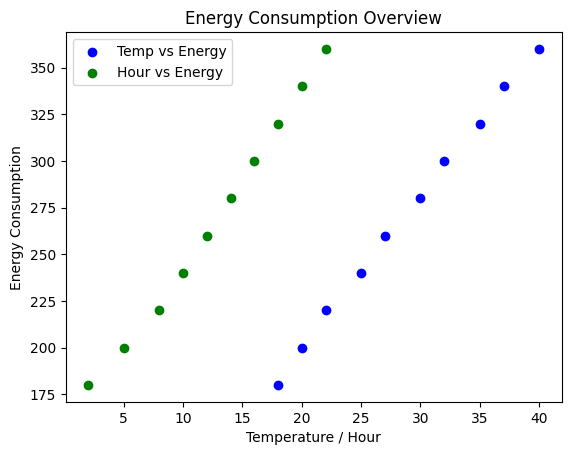

In [20]:
plt.scatter(df["temperature"], df["energy"], color='blue', label='Temp vs Energy')
plt.scatter(df["hour"], df["energy"], color='green', label='Hour vs Energy')
plt.xlabel("Temperature / Hour")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Overview")
plt.legend()
plt.show()



In [21]:
# Features (temperature and hour)
X = df[["temperature", "hour"]]

# Target (energy)
y = df["energy"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X = df[["temperature", "hour"]]
y = df["energy"]

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
# Linear Regression Predictions
y_pred_lr = lr_model.predict(X_test)

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)

# Print R² scores
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Linear Regression R²: 0.9993575661127557
Random Forest R²: 0.9829551020408163


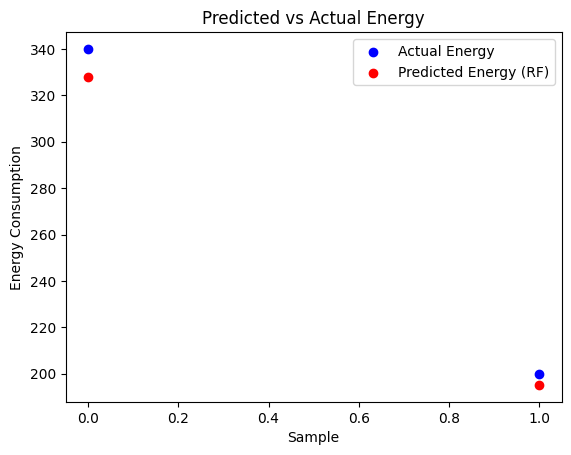

In [25]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Energy')
plt.scatter(range(len(y_test)), y_pred_rf, color='red', label='Predicted Energy (RF)')
plt.xlabel("Sample")
plt.ylabel("Energy Consumption")
plt.title("Predicted vs Actual Energy")
plt.legend()
plt.show()


In [26]:
# Example: Predict energy for temperature=28, hour=12
new_data = pd.DataFrame({"temperature": [28], "hour": [12]})
predicted_energy = rf_model.predict(new_data)
print("Predicted energy consumption for Temp=28°C & Hour=12:", predicted_energy[0])


Predicted energy consumption for Temp=28°C & Hour=12: 259.2


In [28]:
# Save dataset
df.to_csv("energy_consumption.csv", index=False)

# Save predictions
pd.DataFrame({"Actual": y_test, "Predicted": y_pred_rf}).to_csv("energy_predictions.csv", index=False)
